In [1]:
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
bankdata = pd.read_csv('E:/bank-marketing-dataset/bank-additional-full.csv', sep=';')

print(bankdata.shape)
bankdata.head(10)

(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
bankdata['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [4]:
# Build a function to show categorical values disribution
def plot_bar(column):
    # temp df 
    temp = pd.DataFrame()
    # count categorical values
    temp['No_deposit'] = bankdata[bankdata['y'] == 'no'][column].value_counts()
    temp['Yes_deposit'] = bankdata[bankdata['y'] == 'yes'][column].value_counts()
    temp.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show();

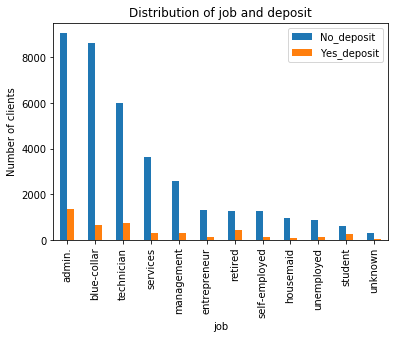

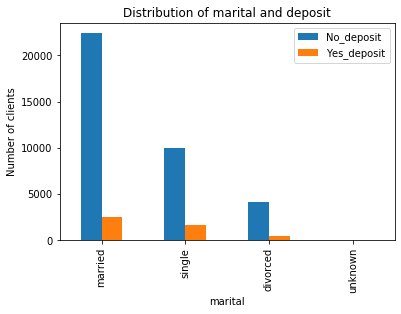

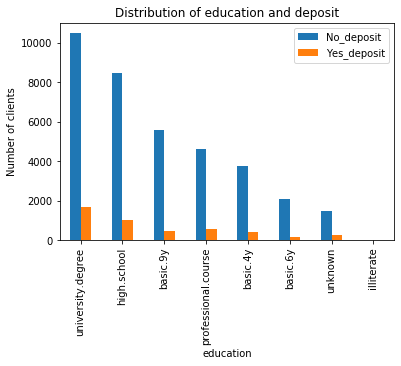

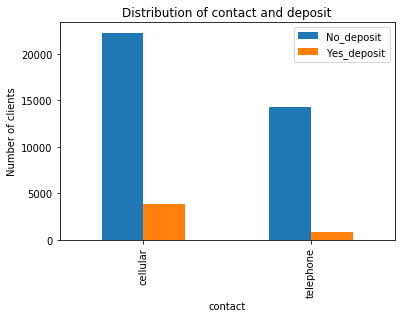

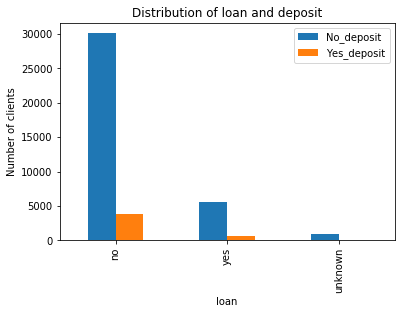

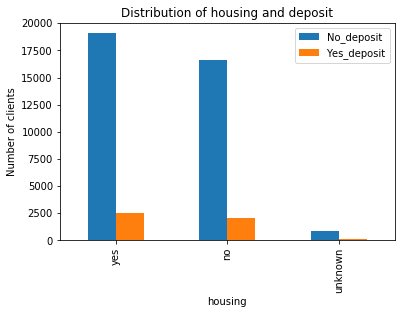

(None, None, None, None, None, None)

In [5]:
plot_bar('job'), plot_bar('marital'), plot_bar('education'), plot_bar('contact'), plot_bar('loan'), plot_bar('housing')

In [6]:
# Convert target variable into numeric
bankdata.y = bankdata.y.map({'no':0, 'yes':1}).astype('uint8')
# Build correlation matrix
corr = bankdata.corr()
corr.style.background_gradient(cmap='PuBu')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1,-0.000865705,0.00459358,-0.034369,0.0243647,-0.000370685,0.000856715,0.129372,0.0107674,-0.0177251,0.0303988
duration,-0.000865705,1,-0.0716992,-0.047577,0.0206404,-0.0279679,0.00531227,-0.00817287,-0.0328967,-0.0447032,0.405274
campaign,0.00459358,-0.0716992,1,0.0525836,-0.0791415,0.150754,0.127836,-0.0137331,0.135133,0.144095,-0.0663574
pdays,-0.034369,-0.047577,0.0525836,1,-0.587514,0.271004,0.0788891,-0.0913424,0.296899,0.372605,-0.324914
previous,0.0243647,0.0206404,-0.0791415,-0.587514,1,-0.420489,-0.20313,-0.0509364,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000370685,-0.0279679,0.150754,0.271004,-0.420489,1,0.775334,0.196041,0.972245,0.90697,-0.298334
cons.price.idx,0.000856715,0.00531227,0.127836,0.0788891,-0.20313,0.775334,1,0.0589862,0.68823,0.522034,-0.136211
cons.conf.idx,0.129372,-0.00817287,-0.0137331,-0.0913424,-0.0509364,0.196041,0.0589862,1,0.277686,0.100513,0.0548779
euribor3m,0.0107674,-0.0328967,0.135133,0.296899,-0.454494,0.972245,0.68823,0.277686,1,0.945154,-0.307771
nr.employed,-0.0177251,-0.0447032,0.144095,0.372605,-0.501333,0.90697,0.522034,0.100513,0.945154,1,-0.354678


In [7]:
bankdata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
dummyjob=pd.get_dummies(bankdata['job'])
d_job = dummyjob.drop(['unknown'],axis=1)
d_job.head()

,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,0


In [9]:
dummymarital=pd.get_dummies(bankdata['marital'])
d_marital=dummymarital.drop(['unknown'],axis=1)
d_marital.head()

,divorced,married,single
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [10]:
dummyedu = pd.get_dummies(bankdata['education'])
d_education = dummyedu.drop(['unknown'],axis=1)
d_education.head()

,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0


In [11]:
dummydefault = pd.get_dummies(bankdata['default'])
d_default = dummydefault.drop(['unknown'], axis=1)
d_default.head()

,no,yes
0,1,0
1,0,0
2,1,0
3,1,0
4,1,0


In [12]:
dummyhouse = pd.get_dummies(bankdata['housing'])
d_housing = dummyhouse.drop(['unknown'], axis=1)
d_housing.head()

,no,yes
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [13]:
dummyloan = pd.get_dummies(bankdata['loan'])
d_loan = dummyloan.drop(['unknown'], axis=1)
d_loan.head()

,no,yes
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


In [14]:
dummypout = pd.get_dummies(bankdata['poutcome'])
d_poutcome = dummypout.drop(['success'], axis=1)
d_poutcome.head()

,failure,nonexistent
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [15]:
d_month = pd.get_dummies(bankdata['month'])
d_month.head()

,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0


In [16]:
print(bankdata.shape)

(41188, 21)


In [17]:
bankdata=pd.concat([bankdata,d_job,d_marital,d_default,d_housing,d_loan,d_poutcome,d_month], join='outer', axis=1)
print(bankdata.shape)

(41188, 53)


In [18]:
bankdata = bankdata.drop(['marital','job', 'education', 'default', 'loan', 
                          'housing', 'month', 'day_of_week', 'poutcome'], axis=1)

In [19]:
print(bankdata.shape)

(41188, 44)


In [20]:
print(list(bankdata.columns))

['age', 'contact', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'divorced', 'married', 'single', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'failure', 'nonexistent', 'apr', 'aug', 'dec', 'jul', 'jun', 'mar', 'may', 'nov', 'oct', 'sep']


In [21]:
# replacing by binary values
bankdata.contact = bankdata.contact.map({'cellular': 1, 'telephone': 0}).astype('uint8')


In [22]:
bankdata.head()

,age,contact,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,apr,aug,dec,jul,jun,mar,may,nov,oct,sep
0,56,0,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,0
1,57,0,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,0
2,37,0,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,0
3,40,0,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,0
4,56,0,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,0,0,0,0,1,0,0,0


In [23]:
X=bankdata.drop('y',axis=1)
y=bankdata['y']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [26]:
#using logistic regression
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel=LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\ashwa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predictions=logmodel.predict(X_test)

In [29]:
from sklearn.metrics import classification_report
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.92      0.98      0.95     10908\n           1       0.68      0.39      0.49      1449\n\n    accuracy                           0.91     12357\n   macro avg       0.80      0.68      0.72     12357\nweighted avg       0.89      0.91      0.90     12357\n'

In [30]:
print('Accuracy of logistic regression classifier on test set: {:.3f}'.format(logmodel.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.907


In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[10647,   261],
       [  889,   560]], dtype=int64)

In [33]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
regmodel=RandomForestClassifier(n_estimators=80)
regmodel.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [34]:
reg_predictions=regmodel.predict(X_test)

In [35]:
#classification report usign random forest
classification_report(y_test,reg_predictions)

'              precision    recall  f1-score   support\n\n           0       0.93      0.97      0.95     10908\n           1       0.64      0.46      0.54      1449\n\n    accuracy                           0.91     12357\n   macro avg       0.79      0.71      0.74     12357\nweighted avg       0.90      0.91      0.90     12357\n'

In [36]:
print('Accuracy of random forest classifier on test set: {:.3f}'.format(regmodel.score(X_test, y_test)))
confusion_matrix(y_test,reg_predictions)

Accuracy of logistic regression classifier on test set: 0.907


array([[10535,   373],
       [  781,   668]], dtype=int64)